<a href="https://colab.research.google.com/github/Martinccv/Otro_trago_Business_Analysis/blob/main/Otro_trago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/resumen_otro_trago_comprobantes.csv', encoding= "latin-1", sep=";")

In [3]:
df.head()

,Fecha,Tipo,Letra,PDV,Numero,Cliente,Doc.Cliente,Neto,Alic.IVA,IVA,Imp.Int.,Percep.IIBB,Provincia,TOTAL,Forma Pago
0,02/03/2023,FACTURA,B,2,1,CONSUMIDOR FINAL,NaN,1.65,21,0.35,NaN,NaN,NaN,2,EFECTIVO
1,02/03/2023,FACTURA,B,2,2,CONSUMIDOR FINAL,NaN,8.26,21,1.74,NaN,NaN,NaN,10,EFECTIVO
2,03/03/2023,FACTURA,B,2,3,CONSUMIDOR FINAL,NaN,0.83,21,0.17,NaN,NaN,NaN,1,EFECTIVO
3,03/03/2023,FACTURA,B,2,4,CONSUMIDOR FINAL,NaN,8.26,21,1.74,NaN,NaN,NaN,10,EFECTIVO
4,03/03/2023,FACTURA,B,2,5,CONSUMIDOR FINAL,NaN,371.90,21,78.10,NaN,NaN,NaN,450,EFECTIVO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16703 entries, 0 to 16702
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        16703 non-null  object 
 1   Tipo         16703 non-null  object 
 2   Letra        16703 non-null  object 
 3   PDV          16703 non-null  int64  
 4   Numero       16703 non-null  int64  
 5   Cliente      16701 non-null  object 
 6   Doc.Cliente  23 non-null     float64
 7   Neto         16703 non-null  float64
 8   Alic.IVA     16703 non-null  int64  
 9   IVA          16703 non-null  float64
 10  Imp.Int.     0 non-null      float64
 11  Percep.IIBB  0 non-null      float64
 12  Provincia    0 non-null      float64
 13  TOTAL        16703 non-null  int64  
 14  Forma Pago   16703 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.9+ MB


In [5]:
df.drop(columns=["Letra","PDV","Doc.Cliente","Alic.IVA","Imp.Int.","Percep.IIBB","Provincia"],inplace=True)

In [6]:
df.head()

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago
0,02/03/2023,FACTURA,1,CONSUMIDOR FINAL,1.65,0.35,2,EFECTIVO
1,02/03/2023,FACTURA,2,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
2,03/03/2023,FACTURA,3,CONSUMIDOR FINAL,0.83,0.17,1,EFECTIVO
3,03/03/2023,FACTURA,4,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
4,03/03/2023,FACTURA,5,CONSUMIDOR FINAL,371.90,78.10,450,EFECTIVO


In [7]:
df = df[df["Tipo"]=="FACTURA"]

In [8]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")

In [9]:
df

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago
0,2023-03-02,FACTURA,1,CONSUMIDOR FINAL,1.65,0.35,2,EFECTIVO
1,2023-03-02,FACTURA,2,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
2,2023-03-03,FACTURA,3,CONSUMIDOR FINAL,0.83,0.17,1,EFECTIVO
3,2023-03-03,FACTURA,4,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
4,2023-03-03,FACTURA,5,CONSUMIDOR FINAL,371.90,78.10,450,EFECTIVO
...,...,...,...,...,...,...,...,...
16698,2024-09-03,FACTURA,16698,CONSUMIDOR FINAL,8099.17,1700.83,9800,TARJETA DE DEBITO
16699,2024-09-03,FACTURA,16699,CONSUMIDOR FINAL,2644.63,555.37,3200,MERCADOPAGO
16700,2024-09-03,FACTURA,16700,CONSUMIDOR FINAL,2644.63,555.37,3200,MERCADOPAGO
16701,2024-09-03,FACTURA,16701,CONSUMIDOR FINAL,1900.83,399.17,2300,MERCADOPAGO


In [10]:
df.Fecha.min()

Timestamp('2023-03-02 00:00:00')

In [11]:
df.Fecha.max()

Timestamp('2024-09-03 00:00:00')

In [12]:
df_muni = df[df["Cliente"]=="MUNICIPALIDAD DE MONTECARLO"]

In [13]:
df_particular = df[df["Cliente"]=="CONSUMIDOR FINAL"]

In [14]:
df_particular.head()

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago
0,2023-03-02,FACTURA,1,CONSUMIDOR FINAL,1.65,0.35,2,EFECTIVO
1,2023-03-02,FACTURA,2,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
2,2023-03-03,FACTURA,3,CONSUMIDOR FINAL,0.83,0.17,1,EFECTIVO
3,2023-03-03,FACTURA,4,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO
4,2023-03-03,FACTURA,5,CONSUMIDOR FINAL,371.90,78.10,450,EFECTIVO


In [15]:
df_muni.head()

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago
327,2023-03-22,FACTURA,327,MUNICIPALIDAD DE MONTECARLO,120578.51,25321.49,145900,EFECTIVO
710,2023-04-11,FACTURA,710,MUNICIPALIDAD DE MONTECARLO,152066.12,31933.88,184000,EFECTIVO
1016,2023-05-04,FACTURA,1016,MUNICIPALIDAD DE MONTECARLO,221239.67,46460.33,267700,EFECTIVO
1697,2023-06-21,FACTURA,1698,MUNICIPALIDAD DE MONTECARLO,209752.07,44047.93,253800,EFECTIVO
2560,2023-08-01,FACTURA,2561,MUNICIPALIDAD DE MONTECARLO,239504.13,50295.87,289800,EFECTIVO


In [16]:
df["Forma Pago"].value_counts()

,count
Forma Pago,
MERCADOPAGO,7712
EFECTIVO,4750
TARJETA DE DEBITO,3694
TARJETA DE CREDITO,545


In [17]:
df_particular["Forma Pago"].value_counts(normalize=1)

,proportion
Forma Pago,
MERCADOPAGO,0.462406
EFECTIVO,0.283427
TARJETA DE DEBITO,0.221489
TARJETA DE CREDITO,0.032678


In [18]:
df_muni["Forma Pago"].value_counts()

,count
Forma Pago,
EFECTIVO,23


In [19]:
df_muni["TOTAL"].sum()

13475200

In [20]:
df_particular["TOTAL"].sum()

55731361

In [21]:
porcentaje_particular = df_particular["TOTAL"].sum()/df["TOTAL"].sum()
porcentaje_particular

0.8052901371591055

In [22]:
porcentaje_muni = df_muni["TOTAL"].sum()/df["TOTAL"].sum()
porcentaje_muni

0.19470986284089453

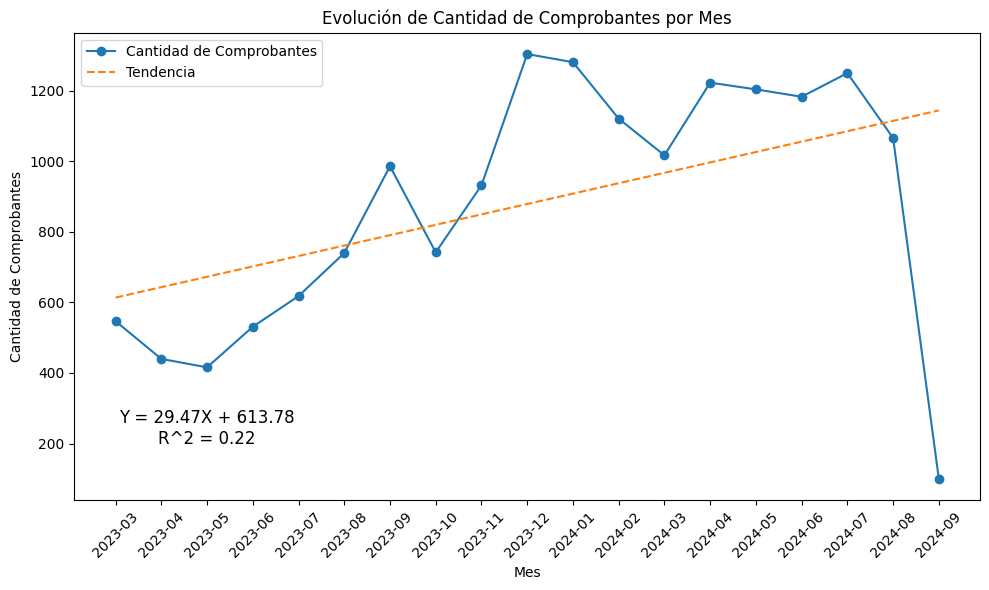

In [23]:
from sklearn.linear_model import LinearRegression

# Simulando los datos proporcionados

# Agrupar por mes y contar la cantidad de comprobantes
df['Mes'] = df['Fecha'].dt.to_period('M')
comprobantes_por_mes = df.groupby('Mes').size().reset_index(name='Cantidad_Comprobantes')

# Crear modelo de regresión lineal
X = np.array(comprobantes_por_mes.index).reshape(-1, 1)  # Usar el índice como variable independiente
y = comprobantes_por_mes['Cantidad_Comprobantes'].values

reg = LinearRegression().fit(X, y)
tendencia = reg.predict(X)

# Obtener la ecuación de la línea y el valor de R^2
pendiente = reg.coef_[0]
interseccion = reg.intercept_
r2 = reg.score(X, y)

# Graficar la evolución de los comprobantes y la línea de tendencia
plt.figure(figsize=(10, 6))
plt.plot(comprobantes_por_mes['Mes'].astype(str), comprobantes_por_mes['Cantidad_Comprobantes'], label='Cantidad de Comprobantes', marker='o')
plt.plot(comprobantes_por_mes['Mes'].astype(str), tendencia, label='Tendencia', linestyle='--')

# Configurar el gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de Comprobantes')
plt.title('Evolución de Cantidad de Comprobantes por Mes')
plt.xticks(rotation=45)
plt.legend()

# Mostrar la ecuación de la línea y el R^2 en el gráfico
plt.text(2,200, f'Y = {pendiente:.2f}X + {interseccion:.2f}\nR^2 = {r2:.2f}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()


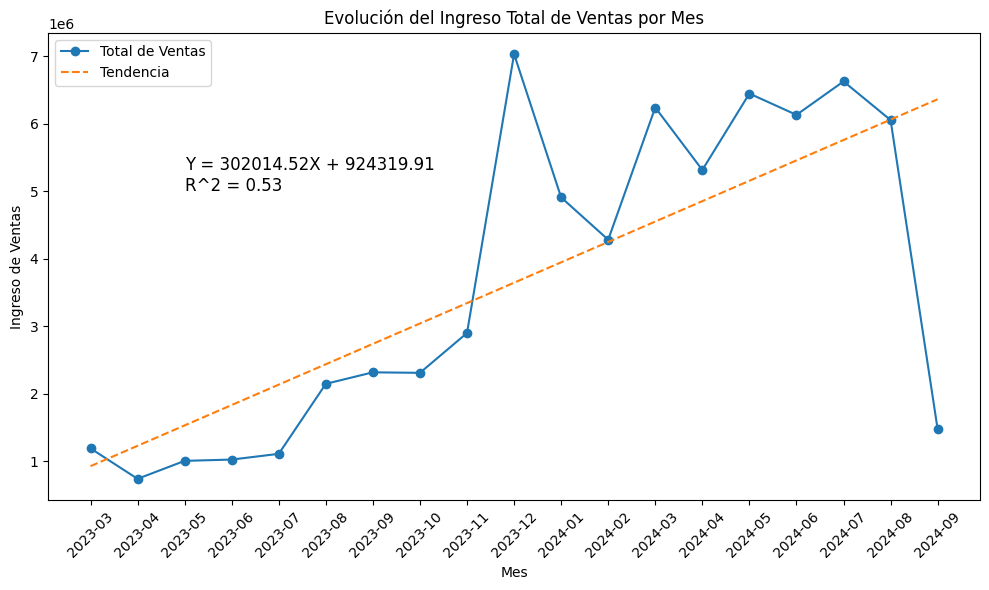

In [24]:
# Agrupar por mes y sumar el valor total de las ventas
total_por_mes = df.groupby('Mes')['TOTAL'].sum().reset_index(name='Total_Ventas')

# Crear modelo de regresión lineal para la evolución del total de ventas
X_total = np.array(total_por_mes.index).reshape(-1, 1)  # Usar el índice como variable independiente
y_total = total_por_mes['Total_Ventas'].values

reg_total = LinearRegression(n_jobs=1).fit(X_total, y_total)
tendencia_total = reg_total.predict(X_total)

# Obtener la ecuación de la línea y el valor de R^2 para la evolución del total de ventas
pendiente_total = reg_total.coef_[0]
interseccion_total = reg_total.intercept_
r2_total = reg_total.score(X_total, y_total)

# Graficar la evolución del total de ventas y la línea de tendencia
plt.figure(figsize=(10, 6))
plt.plot(total_por_mes['Mes'].astype(str), total_por_mes['Total_Ventas'], label='Total de Ventas', marker='o')
plt.plot(total_por_mes['Mes'].astype(str), tendencia_total, label='Tendencia', linestyle='--')

# Configurar el gráfico
plt.xlabel('Mes')
plt.ylabel('Ingreso de Ventas')
plt.title('Evolución del Ingreso Total de Ventas por Mes')
plt.xticks(rotation=45)
plt.legend()

# Mostrar la ecuación de la línea y el R^2 en el gráfico
plt.text(2, 5000000, f'Y = {pendiente_total:.2f}X + {interseccion_total:.2f}\nR^2 = {r2_total:.2f}', fontsize=12)

plt.tight_layout()
plt.show()


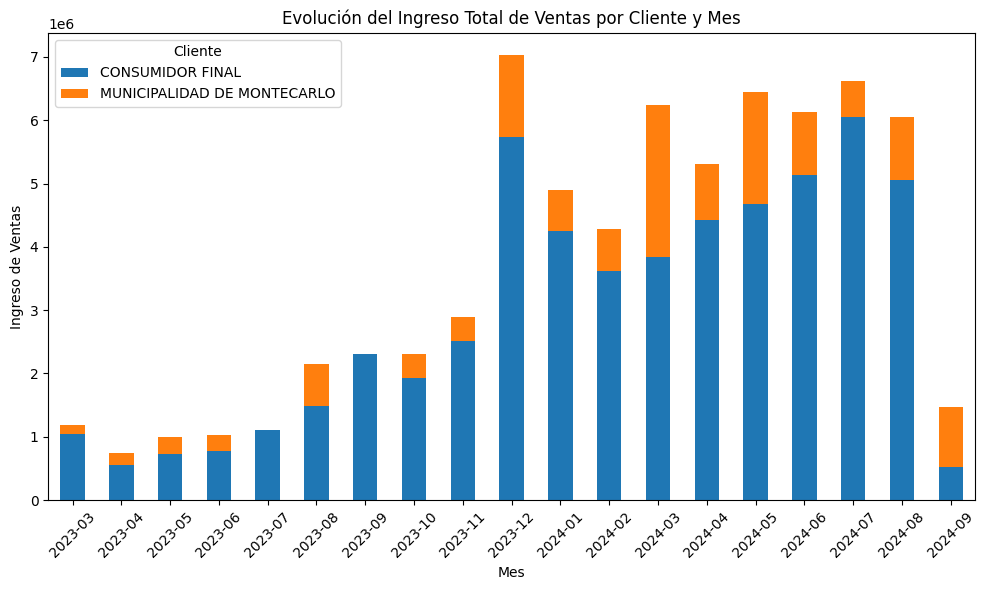

In [25]:

# Convertir la columna 'Fecha' a mes/año y crear una columna para el mes
df['Mes'] = df['Fecha'].dt.to_period('M')

# Agrupar por mes y cliente, sumando las ventas totales
ventas_por_mes_cliente = df.groupby(['Mes', 'Cliente'])['TOTAL'].sum().unstack(fill_value=0)

# Graficar el gráfico de barras apiladas
ventas_por_mes_cliente.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar el gráfico
plt.title('Evolución del Ingreso Total de Ventas por Cliente y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Cliente')

plt.tight_layout()
plt.show()


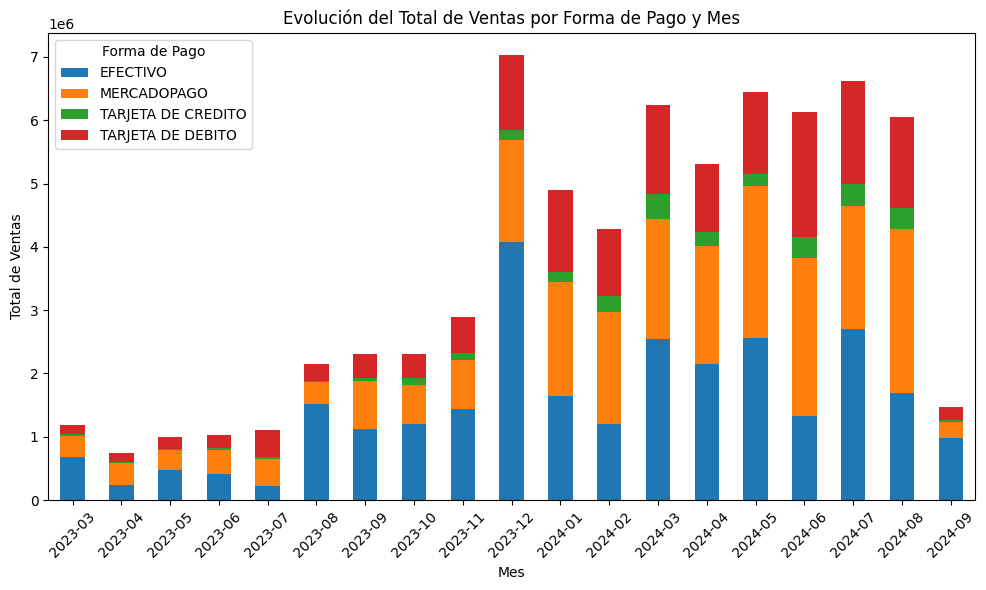

In [26]:
# Agrupar por mes y forma de pago, sumando las ventas totales
ventas_por_mes_pago = df.groupby(['Mes', 'Forma Pago'])['TOTAL'].sum().unstack(fill_value=0)

# Graficar el gráfico de barras apiladas para formas de pago
ventas_por_mes_pago.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar el gráfico
plt.title('Evolución del Total de Ventas por Forma de Pago y Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Forma de Pago')

plt.tight_layout()
plt.show()


In [27]:
df_particular["Forma Pago"].value_counts()

,count
Forma Pago,
MERCADOPAGO,7712
EFECTIVO,4727
TARJETA DE DEBITO,3694
TARJETA DE CREDITO,545


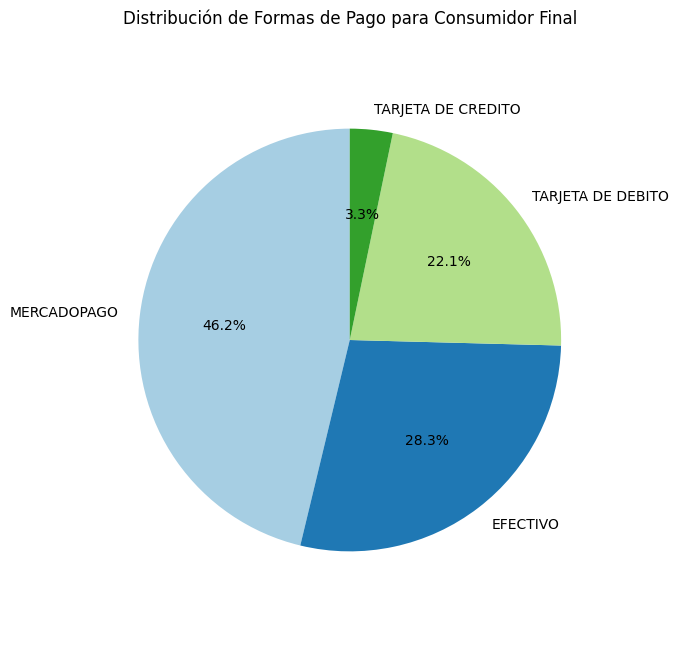

In [28]:

# Agrupar por la forma de pago y contar cuántas veces se usa cada una
formas_pago = df_particular['Forma Pago'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 8))
plt.pie(formas_pago, labels=formas_pago.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Configurar el gráfico
plt.title('Distribución de Formas de Pago para Consumidor Final')
plt.axis('equal')  # Asegura que el gráfico de torta sea circular

plt.show()


In [29]:
ticket_promedio = df['TOTAL'].mean()
ticket_promedio

4143.8573139332975

In [30]:
distribucion_pago = df.groupby('Forma Pago')['TOTAL'].sum()
distribucion_pago

,TOTAL
Forma Pago,
EFECTIVO,28198314
MERCADOPAGO,22931387
TARJETA DE CREDITO,2807890
TARJETA DE DEBITO,15268970


In [31]:
from scipy import stats

# Función para generar las estadísticas descriptivas
def generar_estadisticas(serie):
    # Calcular la moda
    moda = stats.mode(serie, nan_policy='omit')

    estadisticas = {
        'Promedio': np.mean(serie),
        'Error Estandar': stats.sem(serie),
        'Mediana': np.median(serie),
        'Moda': moda[0],  # Valor de la moda
        'Desviacion Estandar': np.std(serie, ddof=1),
        'Varianza': np.var(serie, ddof=1),
        'Kurtosis': stats.kurtosis(serie),
        'Asimetria': stats.skew(serie),
        'Rango': np.ptp(serie),
        'Minimo': np.min(serie),
        'Maximo': np.max(serie),
        'Suma': np.sum(serie),
        'Cuenta': len(serie),
        'Nivel de confianza (95.0%)': stats.t.interval(0.95, len(serie)-1, loc=np.mean(serie), scale=stats.sem(serie))[1] - np.mean(serie)
    }

    # Convertir a DataFrame y organizar en formato vertical
    df_estadisticas = pd.DataFrame(list(estadisticas.items()), columns=['Metricas', 'Valores'])

    return df_estadisticas

# Generar las estadísticas para la columna 'TOTAL'
estadisticas_total = generar_estadisticas(df['TOTAL'])

# Mostrar la tabla generada
print(estadisticas_total)


                      Metricas       Valores
0                     Promedio  4.143857e+03
1               Error Estandar  1.882270e+02
2                      Mediana  2.300000e+03
3                         Moda  1.000000e+03
4          Desviacion Estandar  2.432501e+04
5                     Varianza  5.917062e+08
6                     Kurtosis  1.108904e+03
7                    Asimetria  3.189616e+01
8                        Rango  9.989000e+05
9                       Minimo -1.600000e+03
10                      Maximo  9.973000e+05
11                        Suma  6.920656e+07
12                      Cuenta  1.670100e+04
13  Nivel de confianza (95.0%)  3.689448e+02


In [32]:
df.head()

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago,Mes
0,2023-03-02,FACTURA,1,CONSUMIDOR FINAL,1.65,0.35,2,EFECTIVO,2023-03
1,2023-03-02,FACTURA,2,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO,2023-03
2,2023-03-03,FACTURA,3,CONSUMIDOR FINAL,0.83,0.17,1,EFECTIVO,2023-03
3,2023-03-03,FACTURA,4,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO,2023-03
4,2023-03-03,FACTURA,5,CONSUMIDOR FINAL,371.90,78.10,450,EFECTIVO,2023-03


In [33]:
# Función para generar las estadísticas descriptivas a partir de sumatorias mensuales
def generar_estadisticas(serie):
    moda = stats.mode(serie, nan_policy='omit')

    estadisticas = {
        'Promedio': np.mean(serie),
        'Error Estandar': stats.sem(serie, nan_policy='omit'),
        'Mediana': np.median(serie),
        'Moda': moda[0],  # Valor de la moda
        'Desviacion Estandar': np.std(serie, ddof=1),
        'Varianza': np.var(serie, ddof=1),
        'Kurtosis': stats.kurtosis(serie),
        'Asimetria': stats.skew(serie),
        'Rango': np.ptp(serie),
        'Minimo': np.min(serie),
        'Maximo': np.max(serie),
        'Suma': np.sum(serie),
        'Cuenta': len(serie),
        'Nivel de confianza (95.0%)': stats.t.interval(0.95, len(serie)-1, loc=np.mean(serie), scale=stats.sem(serie))[1] - np.mean(serie)
    }

    return pd.Series(estadisticas)

# Agrupamos los datos por mes y sumamos los valores mensuales
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Asegurarse de que la columna Fecha esté en formato datetime
df_mensual = df.groupby(df["Mes"])
df_mensual_total = df_mensual["TOTAL"].sum()


# Generar las estadísticas para los valores mensuales de la columna 'TOTAL'
estadisticas_total = generar_estadisticas(df_mensual_total)

# Mostrar la tabla generada
print(estadisticas_total)


Promedio                      3.642451e+06
Error Estandar                5.340145e+05
Mediana                       2.897170e+06
Moda                          7.366200e+05
Desviacion Estandar           2.327715e+06
Varianza                      5.418259e+12
Kurtosis                     -1.644325e+00
Asimetria                     1.377268e-01
Rango                         6.293100e+06
Minimo                        7.366200e+05
Maximo                        7.029720e+06
Suma                          6.920656e+07
Cuenta                        1.900000e+01
Nivel de confianza (95.0%)    1.121923e+06
dtype: float64


In [34]:
# Función para generar las estadísticas descriptivas
def generar_estadisticas(serie):
    moda = stats.mode(serie, nan_policy='omit')

    estadisticas = {
        'Promedio': np.mean(serie),
        'Error Estandar': stats.sem(serie, nan_policy='omit'),
        'Mediana': np.median(serie),
        'Moda': moda[0],  # Valor de la moda
        'Desviacion Estandar': np.std(serie, ddof=1),
        'Varianza': np.var(serie, ddof=1),
        'Kurtosis': stats.kurtosis(serie),
        'Asimetria': stats.skew(serie),
        'Rango': np.ptp(serie),
        'Minimo': np.min(serie),
        'Maximo': np.max(serie),
        'Suma': np.sum(serie),
        'Cuenta': len(serie),
        'Nivel de confianza (95.0%)': stats.t.interval(0.95, len(serie)-1, loc=np.mean(serie), scale=stats.sem(serie))[1] - np.mean(serie)
    }

    return pd.Series(estadisticas)

# Asegurarse de que la columna Fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupar los datos por mes y contar la cantidad de comprobantes por mes
df_mensual = df.groupby(df["Mes"])
df_mensual_conteo = df_mensual["TOTAL"].count()  # Conteo de comprobantes por mes

# Generar las estadísticas para los valores de cantidad de comprobantes por mes
estadisticas_conteo = generar_estadisticas(df_mensual_conteo)

# Mostrar la tabla generada
print(estadisticas_conteo)


Promedio                         879.000000
Error Estandar                    81.552050
Mediana                          986.000000
Moda                             100.000000
Desviacion Estandar              355.477144
Varianza                      126364.000000
Kurtosis                          -0.796227
Asimetria                         -0.556201
Rango                           1204.000000
Minimo                           100.000000
Maximo                          1304.000000
Suma                           16701.000000
Cuenta                            19.000000
Nivel de confianza (95.0%)       171.334499
dtype: float64


In [35]:
df_mensual = df.groupby(df["Mes"])
df_mensual_conteo = df_mensual["TOTAL"].count()
df_mensual_conteo

,TOTAL
Mes,
2023-03,547
2023-04,440
2023-05,416
2023-06,531
2023-07,618
2023-08,740
2023-09,986
2023-10,742
2023-11,932


In [36]:
df_mensual = df.groupby(df["Mes"])
df_mensual_total = df_mensual["TOTAL"].sum()
df_mensual_total

,TOTAL
Mes,
2023-03,1187853
2023-04,736620
2023-05,1002970
2023-06,1022140
2023-07,1107090
2023-08,2144130
2023-09,2314600
2023-10,2307100
2023-11,2897170


In [37]:
estadisticas_total.to_csv('estadisticas_total.csv', index=False)

In [38]:
# Datos de ventas mensuales (comprobantes)
ventas_mensuales = {
    'Mes': ['2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
            '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08'],
    'TOTAL': [547, 440, 416, 531, 618, 740, 986, 742, 932, 1304, 1281, 1121, 1017, 1223, 1204, 1183, 1250, 1066]
}

# Datos de ingresos mensuales
ingresos_mensuales = {
    'Mes': ['2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
            '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08'],
    'TOTAL': [1187853, 736620, 1002970, 1022140, 1107090, 2144130, 2314600, 2307100, 2897170, 7029720,
              4906270, 4279000, 6238040, 5312699, 6444848, 6128840, 6624551, 6051920]
}

# Convertir a DataFrame
df_ventas = pd.DataFrame(ventas_mensuales)
df_ingresos = pd.DataFrame(ingresos_mensuales)


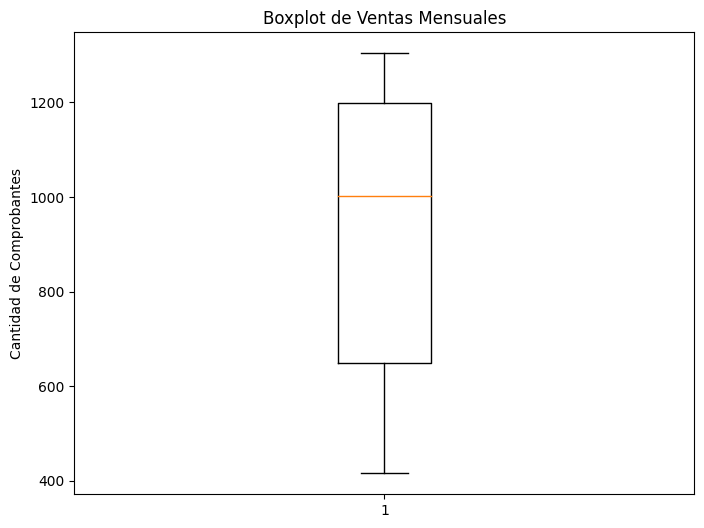

In [39]:
# Crear un boxplot para ambas tablas
plt.figure(figsize=(8, 6))

# Boxplot de ventas mensuales
plt.boxplot(df_ventas['TOTAL'])
plt.title('Boxplot de Ventas Mensuales')
plt.ylabel('Cantidad de Comprobantes')

plt.show()

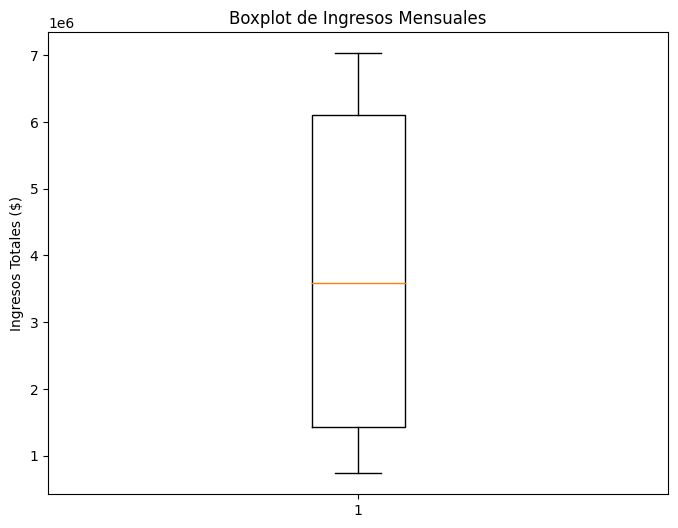

In [40]:
# Crear un boxplot para ambas tablas
plt.figure(figsize=(8, 6))

# Boxplot de ingresos mensuales
plt.boxplot(df_ingresos['TOTAL'])
plt.title('Boxplot de Ingresos Mensuales')
plt.ylabel('Ingresos Totales ($)')

plt.show()

In [41]:
# Crear una nueva columna 'Día de la Semana' usando el atributo day_name()
#df['Día de la Semana'] = df['Fecha'].dt.day_name()
df['Día de la Semana'] = df['Fecha'].dt.strftime('%A')
# Mostrar las primeras filas para verificar
print(df[['Fecha', 'Día de la Semana']].head())

       Fecha Día de la Semana
0 2023-03-02         Thursday
1 2023-03-02         Thursday
2 2023-03-03           Friday
3 2023-03-03           Friday
4 2023-03-03           Friday


In [42]:
# Crear un diccionario para mapear los días de la semana en inglés a español
dias_semana_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Reemplazar los nombres en inglés por los correspondientes en español
df['Día de la Semana'] = df['Día de la Semana'].replace(dias_semana_espanol)

In [43]:
df.head()

,Fecha,Tipo,Numero,Cliente,Neto,IVA,TOTAL,Forma Pago,Mes,Día de la Semana
0,2023-03-02,FACTURA,1,CONSUMIDOR FINAL,1.65,0.35,2,EFECTIVO,2023-03,Jueves
1,2023-03-02,FACTURA,2,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO,2023-03,Jueves
2,2023-03-03,FACTURA,3,CONSUMIDOR FINAL,0.83,0.17,1,EFECTIVO,2023-03,Viernes
3,2023-03-03,FACTURA,4,CONSUMIDOR FINAL,8.26,1.74,10,EFECTIVO,2023-03,Viernes
4,2023-03-03,FACTURA,5,CONSUMIDOR FINAL,371.90,78.10,450,EFECTIVO,2023-03,Viernes


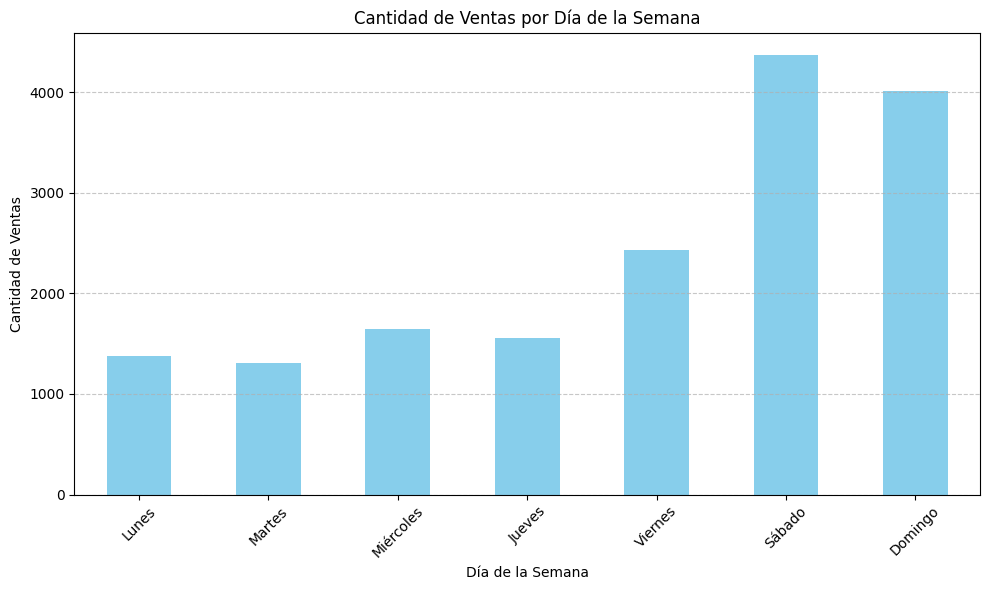

In [44]:
# Definir el orden correcto de los días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Convertir la columna 'Día de la Semana' en una categoría con el orden especificado
df['Día de la Semana'] = pd.Categorical(df['Día de la Semana'], categories=orden_dias, ordered=True)

# Contar la cantidad de ventas por cada día de la semana
ventas_por_dia = df['Día de la Semana'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color='skyblue')

# Etiquetas y título del gráfico
plt.title('Cantidad de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [45]:
porcentaje_fin_semana = ventas_por_dia.loc[["Viernes",'Sábado', 'Domingo']].sum() / ventas_por_dia.sum()
porcentaje_fin_semana

0.6475061373570445

In [46]:
ventas_por_dia

,count
Día de la Semana,
Lunes,1374
Martes,1311
Miércoles,1641
Jueves,1561
Viernes,2429
Sábado,4372
Domingo,4013


In [47]:
porcentaje_ingreso_fin_semana = df.groupby('Día de la Semana')['TOTAL'].sum().loc[["Viernes",'Sábado', 'Domingo']].sum() / df['TOTAL'].sum()
porcentaje_ingreso_fin_semana

<ipython-input-47-f57d09bf03e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentaje_ingreso_fin_semana = df.groupby('Día de la Semana')['TOTAL'].sum().loc[["Viernes",'Sábado', 'Domingo']].sum() / df['TOTAL'].sum()


0.6149835996040895

In [48]:
suma_ventas_fin_semana = ventas_por_dia.loc[["Viernes",'Sábado', 'Domingo']].sum()
suma_ventas_fin_semana

10814

<ipython-input-49-0797520c208d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingreso_por_dia = df.groupby('Día de la Semana')['TOTAL'].sum().reindex(orden_dias)


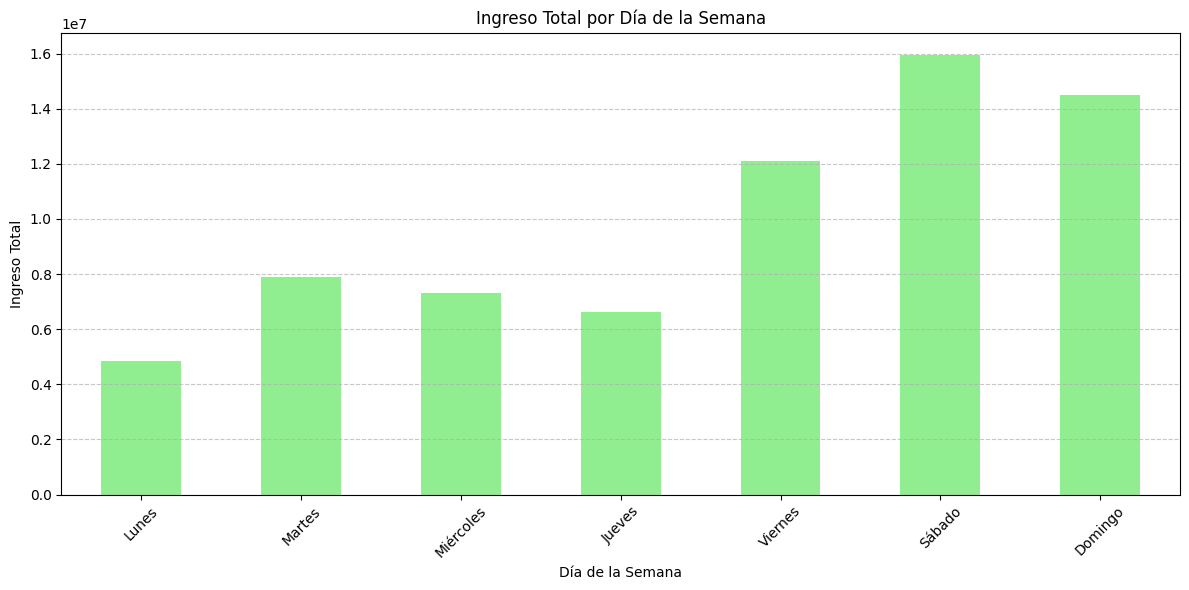

In [49]:
# Calcular el ingreso total (columna TOTAL) por día de la semana
ingreso_por_dia = df.groupby('Día de la Semana')['TOTAL'].sum().reindex(orden_dias)

# Crear el gráfico de barras para la cantidad de ventas por día
plt.figure(figsize=(12, 6))
ingreso_por_dia.plot(kind='bar', color='lightgreen')
plt.title('Ingreso Total por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ingreso Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()


In [51]:
df_redes= pd.read_csv("seguidores_limpio.csv")

In [52]:
df_redes.head()

,Indice,href,username,timestamp
0,47961,https://www.instagram.com/flordonosso,flordonosso,2021-10-01
1,47960,https://www.instagram.com/cristianvazq89,cristianvazq89,2021-10-08
2,47959,https://www.instagram.com/lu._.osorio,lu._.osorio,2021-10-12
3,47958,https://www.instagram.com/grisepipke,grisepipke,2021-10-15
4,47957,https://www.instagram.com/briandanieldavalo,briandanieldavalo,2021-10-15


In [56]:
df_redes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47962 entries, 0 to 47961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indice     47962 non-null  int64         
 1   href       47962 non-null  object        
 2   username   47962 non-null  object        
 3   timestamp  47962 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.5+ MB


In [55]:
df_redes['timestamp'] = pd.to_datetime(df_redes['timestamp'])

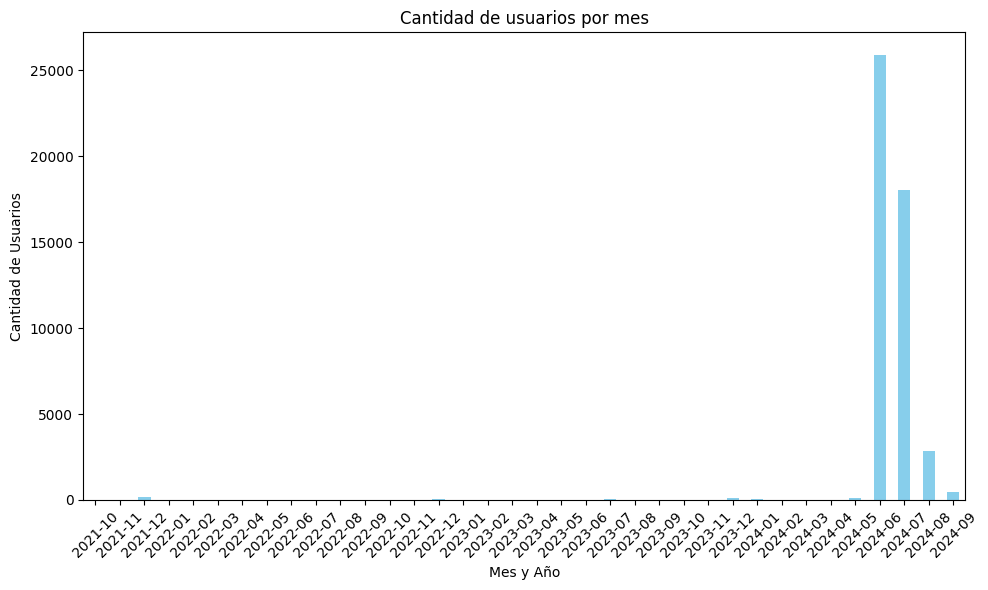

In [57]:
# Crear una nueva columna con el mes y año
df_redes['month_year'] = df_redes['timestamp'].dt.to_period('M')

# Contar la cantidad de usuarios por mes
usuarios_por_mes = df_redes.groupby('month_year').size()

# Generar el gráfico
plt.figure(figsize=(10, 6))
usuarios_por_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de usuarios por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


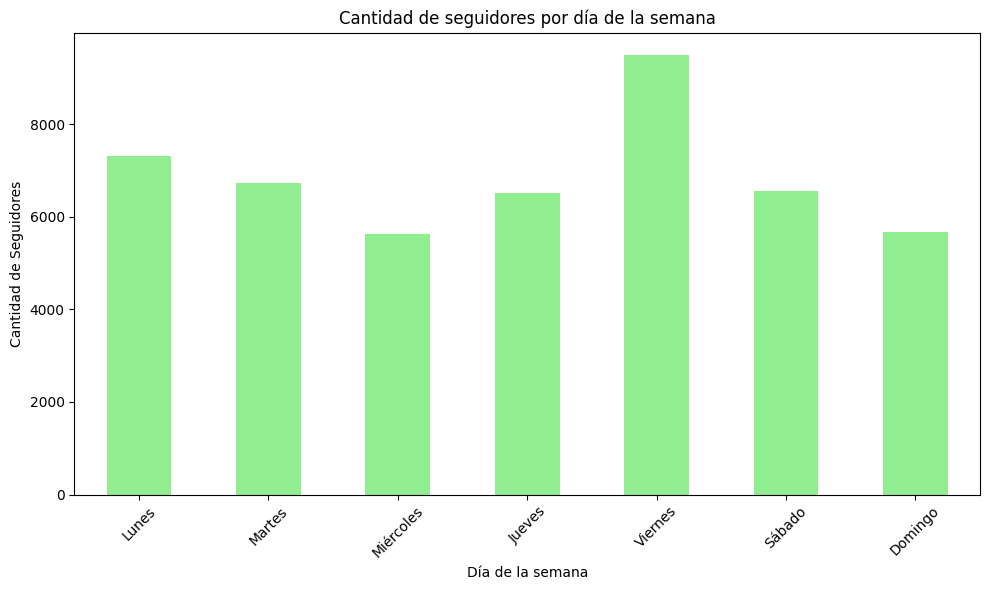

In [64]:
# Crear una nueva columna con el día de la semana (Monday=0, Sunday=6)
df_redes['dias de la semana'] = df_redes['timestamp'].dt.day_name()

# Crear un diccionario para mapear los días de la semana en inglés a español
dias_semana_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Reemplazar los nombres en inglés por los correspondientes en español
df_redes['dias de la semana'] = df_redes['dias de la semana'].replace(dias_semana_espanol)

# Definir el orden correcto de los días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
# Contar la cantidad de usuarios por día de la semana
usuarios_por_dia = df_redes.groupby('dias de la semana').size()
usuarios_por_dia = usuarios_por_dia.reindex(orden_dias)

# Generar el gráfico
plt.figure(figsize=(10, 6))
usuarios_por_dia.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de seguidores por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Seguidores')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()